### 1. Data Understanding

In [1]:
# Importing the packages to read the dataset and for visualization
import pandas as pd
import numpy as np

In [2]:
# Load the dataset 
df=pd.read_csv('insurance.csv')

In [3]:
# First 5 rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Last 5 rows
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
# number of rows and columns
df.shape

(1338, 7)

In [6]:
# Information of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# Statisctics info
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
# Columns names
print(df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [9]:
# Gender count
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [10]:
# Childern count
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [11]:
# Smoker count
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [12]:
#Region count
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

### 2. Data Preprocessing


In [13]:
# Encoding categorical features (sex,smoker,region)

In [14]:
# Convert str values in sex column to lowercase and remove whitespace

df['sex'] = df['sex'].str.lower().str.strip()

In [15]:
# For sex column
df.replace({'sex':{'male':0, 'female':1}}, inplace=True)

# For smoker column
df.replace({'smoker':{'no':0, 'yes':1}}, inplace=True)

# For region column
df.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

/var/folders/y_/lqpbjx1n5hbc4kkyxd4jv3g40000gn/T/ipykernel_11767/3559658358.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'sex':{'male':0, 'female':1}}, inplace=True)
/var/folders/y_/lqpbjx1n5hbc4kkyxd4jv3g40000gn/T/ipykernel_11767/3559658358.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'smoker':{'no':0, 'yes':1}}, inplace=True)
/var/folders/y_/lqpbjx1n5hbc4kkyxd4jv3g40000gn/T/ipykernel_11767/3559658358.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in 

In [16]:
print(df['sex'].unique())
print(df['smoker'].unique())
print(df['region'].unique)

[1 0]
[1 0]
<bound method Series.unique of 0       1
1       0
2       0
3       3
4       3
       ..
1333    3
1334    2
1335    0
1336    1
1337    3
Name: region, Length: 1338, dtype: int64>


In [17]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [18]:
# The value counts for sex, smoker, region columns after encoding
print(df['sex'].value_counts())
print(df['smoker'].value_counts())
print(df['region'].value_counts())

sex
0    676
1    662
Name: count, dtype: int64
smoker
0    1064
1     274
Name: count, dtype: int64
region
0    364
1    325
3    325
2    324
Name: count, dtype: int64


In [19]:
# Checking all columns are numerical values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


### 3. Data Splitting 

In [20]:
# Select the features and target
X = df.drop(columns='charges', axis=1)
y = df['charges']

In [21]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       1
1      18    0  33.770         1       0       0
2      28    0  33.000         3       0       0
3      33    0  22.705         0       0       3
4      32    0  28.880         0       0       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       3
1334   18    1  31.920         0       0       2
1335   18    1  36.850         0       0       0
1336   21    1  25.800         0       0       1
1337   61    1  29.070         0       1       3

[1338 rows x 6 columns]


In [22]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [23]:
# Import the libry to split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.2,
                                                   random_state=42)

In [24]:
X_train.shape

(1070, 6)

In [25]:
X_test.shape

(268, 6)

In [26]:
y_train.shape

(1070,)

In [27]:
y_test.shape

(268,)

### 4. Modeling

In [28]:
# Import libraries for modeling
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
# Build the steps
steps = [('scaler', StandardScaler()),
         ('poly', PolynomialFeatures(degree=2, include_bias=False)),
         ('regressor', LinearRegression())
]

In [30]:
#Define parameter grid for degrees
parameters = {
    'poly__degree': [2, 3, 4, 5, 6, 7, 8, 9]}


In [31]:
# Build the pipeline
pipeline = Pipeline(steps)

In [32]:
# GridSearchCV to find best degree

poly_grid = GridSearchCV(pipeline, parameters,
    scoring='neg_mean_squared_error', 
    cv=5,  # 5-fold cross-validation
    verbose=True)

In [33]:
# Fit the model 
poly_grid.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('regressor', LinearRegression())]),
             param_grid={'poly__degree': [2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='neg_mean_squared_error', verbose=True)

In [34]:
# For best parameters

best_para = poly_grid.best_params_

print('best order is: ', best_para)

best order is:  {'poly__degree': 2}


In [35]:
# Prediction on training data
ytrain_pred = poly_grid.predict(X_train)

In [36]:
ytrain_pred

array([ 9826.75 ,  9001.   , 11222.625, ..., 12698.875, 54565.125,
       12301.375])

In [37]:
# Prediction on testing data
y_pred = poly_grid.predict(X_test)

In [38]:
y_pred

array([10475.25 ,  6499.   , 33829.75 , 10539.5  , 29714.375,  5653.375,
        3437.125, 15747.   ,  3659.625, 11877.125, 20289.75 ,  9146.875,
        5604.875, 49558.375, 53509.5  , 45609.375,  9998.125, 42254.25 ,
        9900.5  , 26475.875,  5590.   ,  9358.875,  3127.375,  3925.375,
       13158.   , 11846.125, 14249.25 ,  8554.125, 11190.875,  2703.875,
       10081.25 , 12704.875,  3157.5  ,  7486.25 ,  4873.625,  8500.75 ,
        4931.625,  9215.125, 25600.75 , 37147.   ,  7049.125,  4924.5  ,
       13432.5  , 12501.375,  6052.   , 14497.   ,  7133.625,  6699.625,
       40008.875,  5343.125, 15448.375,  3381.125,  8647.125,  2916.   ,
       12783.625, 11823.125,  4421.375, 36735.875, 13496.5  , 11483.875,
       15699.375,  4775.75 , 16275.5  ,  9703.   , 11098.75 ,  6118.375,
       20828.5  , 12111.125,  5282.125,  3039.375,  7605.   , 11189.625,
        9609.375,  7770.125,  8481.875,  6277.625,  6797.875, 11745.25 ,
        5872.125, 10900.5  ,  2805.75 , 33381.75 , 

In [39]:
df_train_result=pd.DataFrame({'Actual': y_train, 'Predict_values':ytrain_pred})
df_train_result

,Actual,Predict_values
560,9193.83850,9826.750
1285,8534.67180,9001.000
1142,27117.99378,11222.625
969,8596.82780,8773.125
486,12475.35130,13399.000
...,...,...
1095,4561.18850,7791.250
1130,8582.30230,8872.750
1294,11931.12525,12698.875
860,46113.51100,54565.125


In [40]:
# Rounding (the decimal values) on train data
df_train_result=pd.DataFrame({'Actual': np.round(y_train), 'Predict_values':np.round(ytrain_pred)})
df_train_result

,Actual,Predict_values
560,9194.0,9827.0
1285,8535.0,9001.0
1142,27118.0,11223.0
969,8597.0,8773.0
486,12475.0,13399.0
...,...,...
1095,4561.0,7791.0
1130,8582.0,8873.0
1294,11931.0,12699.0
860,46114.0,54565.0


In [41]:
# Rounding (the decimal values) on testing data
df_train_result=pd.DataFrame({'Actual': np.round(y_test), 'Predict_values':np.round(y_pred)})
df_train_result

,Actual,Predict_values
764,9095.0,10475.0
887,5272.0,6499.0
890,29331.0,33830.0
1293,9302.0,10540.0
259,33750.0,29714.0
...,...,...
109,47056.0,47034.0
575,12223.0,12687.0
535,6067.0,7324.0
543,63770.0,58212.0


### 5. Visualize the result

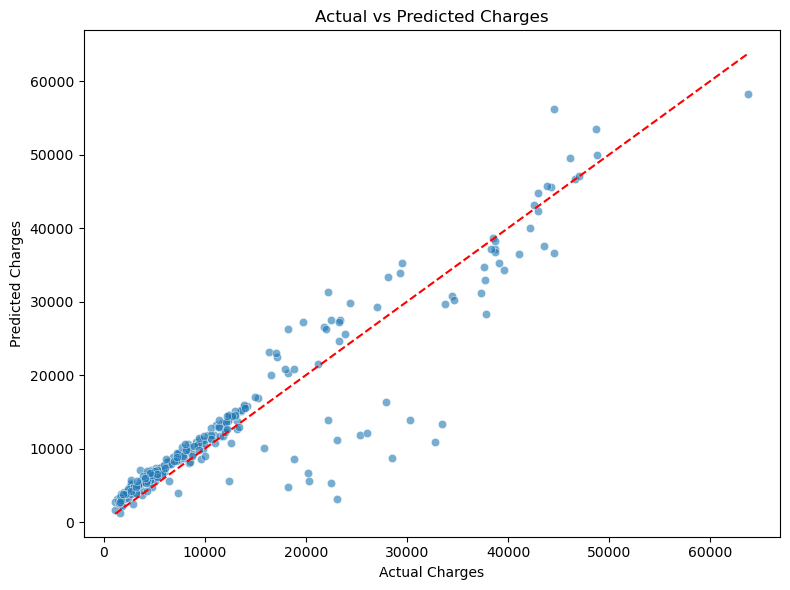

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))

sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.tight_layout()
plt.show()

### 6. Model Evaluation


In [43]:
# Import libraries for model evaluation

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [44]:
# Evaluate on the training set
mae = mean_absolute_error (y_train,ytrain_pred)
mse = mean_squared_error (y_train,ytrain_pred)
r2 = r2_score (y_train,ytrain_pred)

print('MAE: ', np.round(mae))
print('MSE: ', np.round(mse))
print('R2 score: ', r2)

MAE:  2934.0
MSE:  23283560.0
R2 score:  0.8386823576578596


In [45]:
# Evaluate on the testing set
mae = mean_absolute_error (y_test,y_pred)
mse = mean_squared_error (y_test,y_pred)
r2 = r2_score (y_test,y_pred)

print('MAE: ', np.round(mae))
print('MSE: ', np.round(mse))
print('R2 score: ', r2)

MAE:  2751.0
MSE:  20152955.0
R2 score:  0.8701892466592334


In [46]:
np.mean(y_test)

12968.317062869404